In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from dataset import batcher

In [117]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.0001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [136]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year='malawi-2016', bucket=False, shuffle=False, split='custom', repeat=1, batch_size=3511).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [137]:
# Load model
experiments = ['imagery_sample_cnn_regression_NL']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [138]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
    loss=LOSS,
    optimizer=OPT,
    metrics=METRICS,
)

y_preds = trained_model.predict(x_true)
print(y_preds)

 1/21 [>.............................] - ETA: 4s

2023-02-22 18:06:34.995949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 3s 121ms/step
[[-7.8135867 ]
 [ 0.28838342]
 [-7.204392  ]
 [-8.382779  ]
 [-8.392231  ]
 [ 0.04032683]
 [ 0.24602903]
 [-7.6174164 ]
 [-8.65311   ]
 [-4.747484  ]
 [-8.436286  ]
 [-1.191432  ]
 [-8.195968  ]
 [-4.480253  ]
 [ 9.3930025 ]
 [ 0.26669523]
 [-7.952518  ]
 [ 0.2393763 ]
 [-8.418554  ]
 [-0.23226477]
 [-8.875502  ]
 [-7.5771894 ]
 [-8.43823   ]
 [-8.154155  ]
 [-6.7831235 ]
 [ 4.122225  ]
 [-8.57207   ]
 [-7.4608817 ]
 [-8.542842  ]
 [-7.185156  ]
 [-8.169705  ]
 [-7.6371746 ]
 [-1.6995746 ]
 [-8.044583  ]
 [-7.0985494 ]
 [-8.65311   ]
 [-8.410497  ]
 [-8.689176  ]
 [-7.024623  ]
 [-8.308447  ]
 [-8.028082  ]
 [-8.408376  ]
 [ 0.92996085]
 [-8.699471  ]
 [-8.596778  ]
 [-8.045555  ]
 [-7.225823  ]
 [ 2.2548788 ]
 [-8.157665  ]
 [-4.272486  ]
 [-8.2446165 ]
 [-4.8284206 ]
 [-4.747484  ]
 [ 0.2987473 ]
 [-7.814841  ]
 [-8.876465  ]
 [-8.196837  ]
 [-7.267644  ]
 [-7.179103  ]
 [-8.910165  ]
 [-8.63701   ]
 [-7.3143106 ]
 [-8.653705  ]


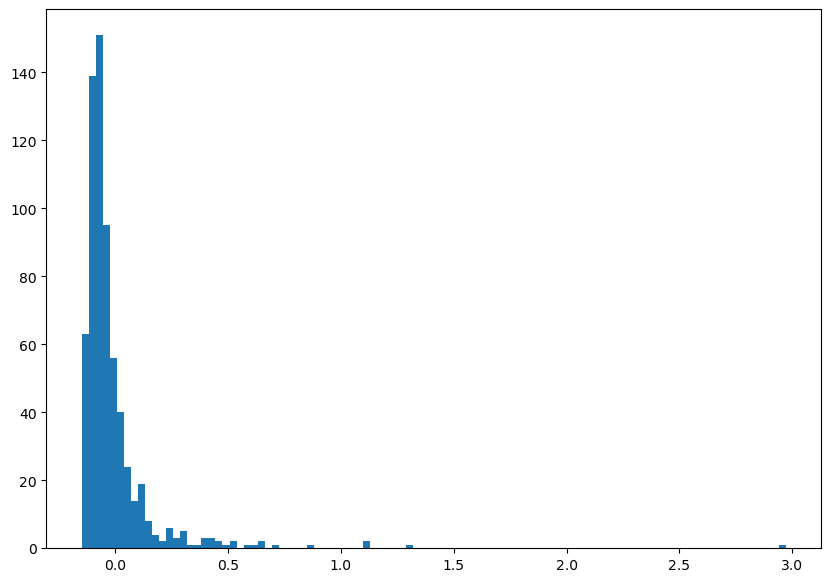

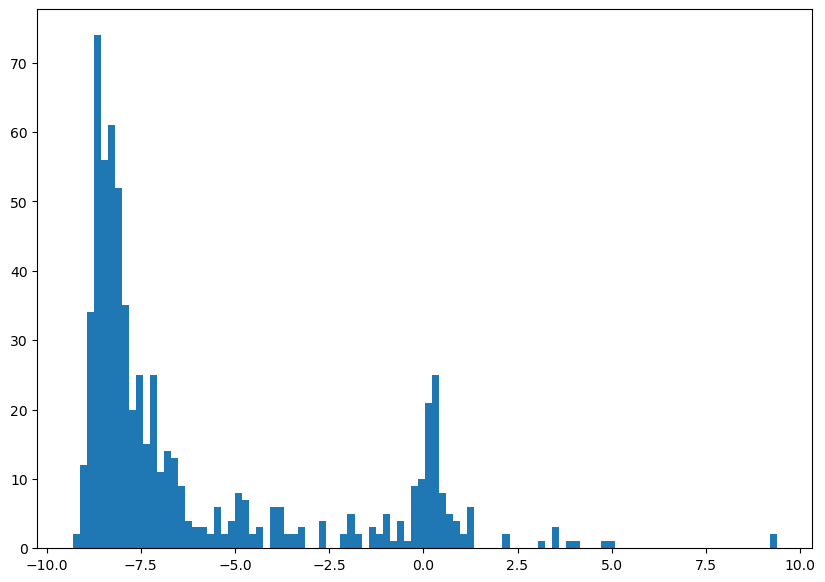

In [139]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()

y_true = 2 * ((y_true - min(y_true)) / (max(y_true) - min(y_true))) - 1
y_preds =2 * ((y_preds - min(y_preds)) / (max(y_preds) - min(y_preds))) - 1


r2 = pearsonr(y_true, y_preds)[0]

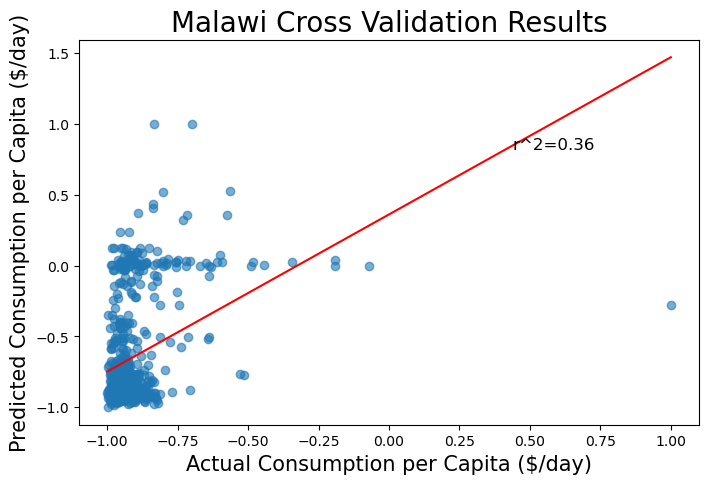

In [140]:
# Plot predictions
country = 'Malawi'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()